In [55]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> data clean-up

In [56]:
df = pd.read_csv('../data/polo_data.csv',sep=';')
print(len(df))
df.head()


807


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,154.900 kr.,2018,147000,2018-02-28,Benzin,21.7,95,A,7700
1,339.900 kr.,2022,8000,2022-06-03,Benzin,17.5,207,A,4700
2,209.900 kr.,2018,73000,2018-05-25,Benzin,21.7,95,A,3520
3,7.900 kr.,2002,280000,2002-10-16,Benzin,15.5,75,M,6000
4,249.800 kr.,2018,72000,2018-08-15,Benzin,16.9,200,A,6760


In [57]:
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,154900,2018,147000,2018,Benzin,21.7,95,A,7700
1,339900,2022,8000,2022,Benzin,17.5,207,A,4700
2,209900,2018,73000,2018,Benzin,21.7,95,A,3520
3,7900,2002,280000,2002,Benzin,15.5,75,M,6000
4,249800,2018,72000,2018,Benzin,16.9,200,A,6760
...,...,...,...,...,...,...,...,...,...
802,189900,2018,88000,2018,Benzin,21.3,115,A,6500
803,249900,2019,27000,2019,Benzin,18.0,200,A,6270
804,192000,2016,42000,2015,Benzin,21.3,150,A,5700
805,73500,2010,161000,2010,Diesel,29.4,75,M,2100


In [58]:

if(df['fuel_type'][0] != 'El'):
    df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,154900,2018,147000,2018,21.7,95,7700,1,0,1,0
1,339900,2022,8000,2022,17.5,207,4700,1,0,1,0
2,209900,2018,73000,2018,21.7,95,3520,1,0,1,0
3,7900,2002,280000,2002,15.5,75,6000,0,1,1,0
4,249800,2018,72000,2018,16.9,200,6760,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
802,189900,2018,88000,2018,21.3,115,6500,1,0,1,0
803,249900,2019,27000,2019,18.0,200,6270,1,0,1,0
804,192000,2016,42000,2015,21.3,150,5700,1,0,1,0
805,73500,2010,161000,2010,29.4,75,2100,0,1,0,1


In [59]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df['km'].values.reshape(-1,1))
df['km'] = pd.DataFrame(scaled_df,columns=["km"])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,154900,2018,0.412921,2018,21.7,95,7700,1,0,1,0
1,339900,2022,0.022472,2022,17.5,207,4700,1,0,1,0
2,209900,2018,0.205056,2018,21.7,95,3520,1,0,1,0
3,7900,2002,0.786517,2002,15.5,75,6000,0,1,1,0
4,249800,2018,0.202247,2018,16.9,200,6760,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
802,189900,2018,0.247191,2018,21.3,115,6500,1,0,1,0
803,249900,2019,0.075843,2019,18.0,200,6270,1,0,1,0
804,192000,2016,0.117978,2015,21.3,150,5700,1,0,1,0
805,73500,2010,0.452247,2010,29.4,75,2100,0,1,0,1


<h2>Prediction

In [60]:
#X = ''
#if(df['fuel_type'][0] != 'El'):
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
#else:
    #X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [61]:

#min_max.transform(np.array(8000).reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_test,y_test)}')

info_dict = {
    'model_year':2018,
    'km': 40000,
    'reg':2019,
    'fuel_economy':19.3,
    'horse_power':100,
    'gear_type_A': 1,
    'gear_type_M': 0,
    'fuel_type_Benzin': 1,
    'fuel_type_Diesel': 0
}

pred_price = regr.predict(pd.DataFrame(info_dict,index=[0]))

#289900
print(pred_price)

y_pred = regr.predict(X_test)
    

Regression score: 0.9509342091932551
[-5.68693502e+09]


In [62]:
110/112*100

98.21428571428571

In [63]:
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [64]:
get_prediction_score(y_test,y_pred)

91.5188945354839

<h1>data visualization

In [65]:
import seaborn as sns

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
price,1.000000,0.843693,-0.793588,0.848053,-0.250847,0.647486,-0.010592,0.640793,-0.640793,0.387777,-0.387777
model_year,0.843693,1.000000,-0.781710,0.993804,0.081444,0.342536,0.006658,0.443782,-0.443782,0.320292,-0.320292
km,-0.793588,-0.781710,1.000000,-0.778249,0.184165,-0.263981,0.077816,-0.371435,0.371435,-0.531271,0.531271
reg,0.848053,0.993804,-0.778249,1.000000,0.074177,0.353775,0.004258,0.448752,-0.448752,0.312913,-0.312913
fuel_economy,-0.250847,0.081444,0.184165,0.074177,1.000000,-0.468194,0.070471,-0.222410,0.222410,-0.692789,0.692789
horse_power,0.647486,0.342536,-0.263981,0.353775,-0.468194,1.000000,0.017993,0.490528,-0.490528,0.243075,-0.243075
zip_code,-0.010592,0.006658,0.077816,0.004258,0.070471,0.017993,1.000000,-0.026635,0.026635,-0.101947,0.101947
gear_type_A,0.640793,0.443782,-0.371435,0.448752,-0.222410,0.490528,-0.026635,1.000000,-1.000000,0.179953,-0.179953
gear_type_M,-0.640793,-0.443782,0.371435,-0.448752,0.222410,-0.490528,0.026635,-1.000000,1.000000,-0.179953,0.179953
fuel_type_Benzin,0.387777,0.320292,-0.531271,0.312913,-0.692789,0.243075,-0.101947,0.179953,-0.179953,1.000000,-1.000000


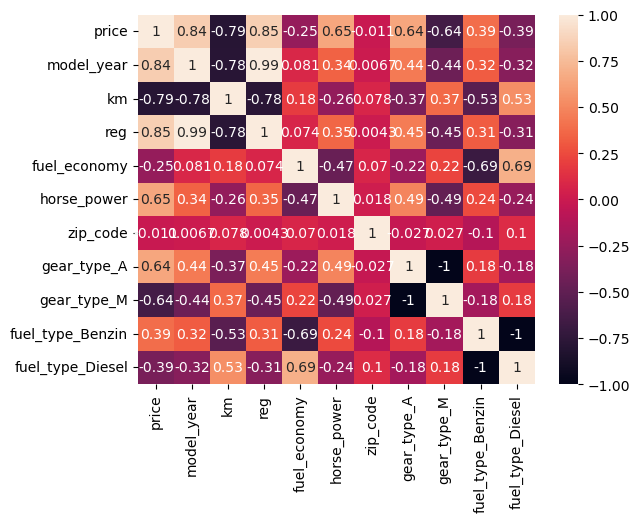

In [66]:
sns.heatmap(df.corr(), annot=True)
df.corr()

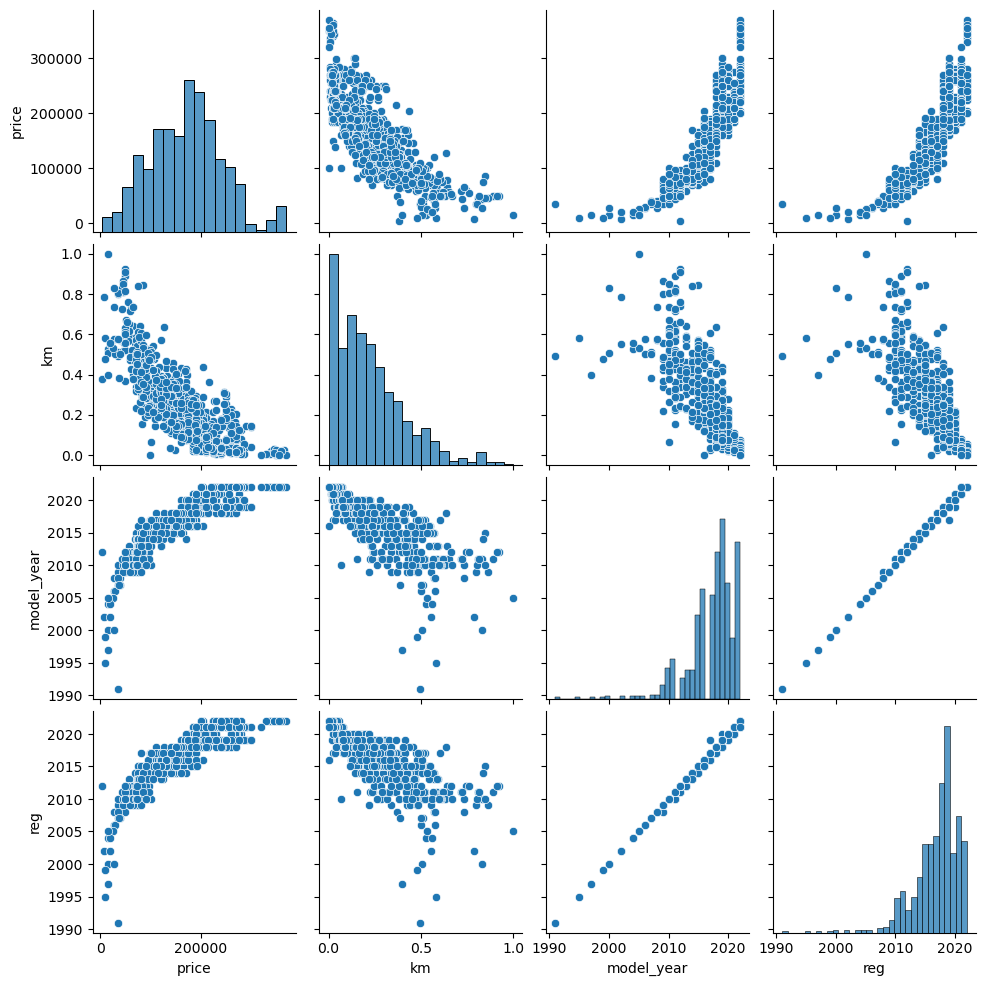

In [67]:
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='model_year'>

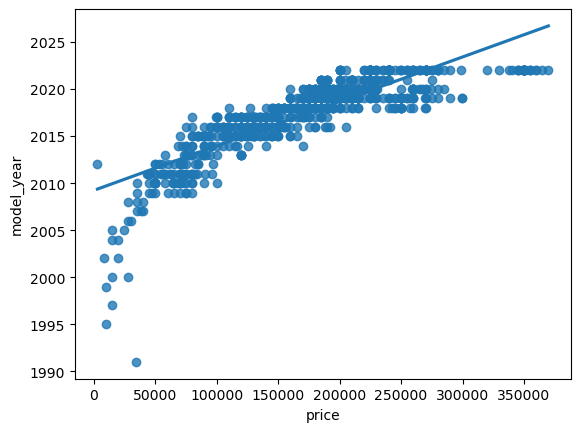

In [68]:
sns.regplot(x=df['price'], y=df['model_year'], ci=None)